### Table of Contents

* [20%-80% rule of content generation](#chapter1)
    
* [Circadian rhythms](#chapter2)
    
* [Attention and productivity](#chapter3)

## Dataset extraction

In [8]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy import stats

%matplotlib inline
%matplotlib nbagg

In this section we create a dataset that contains only the relevant information for our analysis. We do this, because the original database takes up 30Gb, and we only need a small fraction of this. The resulting dataset is around 40Mb.

In [2]:
PATH = "../database.sqlite"
database = sqlite3.connect(PATH)
df = pd.read_sql("SELECT author FROM May2015", database)

We select a random number of users from the list of all Reddit users in May 2015. This new set of users is representative of the population. We choose to select 35000 users, because in the original paper they obtain a similar number of Twitter users (around 34000).

In [3]:
authors = pd.DataFrame()
authors['author'] = df['author'].unique()
authors_sample = authors.sample(n=35000, random_state=10)

We are only interested in the columns created_utc, subreddit_id, score_hidden, subreddit, author, score, and parent_id of the comments that belong to the users in our sample.

In [4]:
query = 'SELECT created_utc, subreddit_id, score_hidden, subreddit, author, score, parent_id FROM May2015 WHERE author in ' + str(tuple(authors_sample['author']))
dataset = pd.read_sql(query, database)

```comments.csv``` is the file that we use for all the data analysis tasks. It contains around comments.

In [5]:
dataset.to_csv("comments.csv", index=False)

# 20%-80% rule of content generation <a class="anchor" id="chapter1"></a>
### As for this part, we wanted to test the 20%-80% rule of content generation proposition with our dataset of the comments on Reddit in May 2015.<br>The first task is to investigate the complementary cumulative distribution of the number of comments per author of this dataset.

In [2]:
comments = pd.read_csv("comments.csv")

In [3]:
comments.head()

,created_utc,subreddit_id,score_hidden,subreddit,author,score,parent_id
0,1430438400,t5_2qjvn,0,relationships,silverraven1189,6,t1_cqu8cmw
1,1430438400,t5_2sqho,0,GlobalOffensive,BEE_REAL_,5,t3_34gmag
2,1430438400,t5_2sqw4,0,makinghiphop,KingEze,1,t1_cqs3tw2
3,1430438401,t5_2qh1i,0,AskReddit,JuanTutrego,1,t1_cqtdj4m
4,1430438401,t5_2qh2p,0,atheism,brandana,-4,t1_cqufwrf


In [124]:
target = comments.loc[:,'author'].value_counts().to_frame()
new_df = pd.DataFrame(target.loc[:,'author'].value_counts())
new_df.reset_index(drop = False, inplace = True)
new_df.columns = ['comments_count', '# of users']
new_df = new_df.sort_values(by = 'comments_count')

In [125]:
target.head()

,author
autowikibot,17805
TweetPoster,14046
Thaddeus-J-Spiderman,6002
pineapple_lumps,4983
ContentForager,4341


In [ ]:
new_df1 = new_df[['comments_count', '# of users']] 
s1 = new_df1['# of users'].sum()
new_df1['percentage'] = new_df1['# of users']/s1
new_df1['cummu'] = new_df1['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
new_df1['comp_commu'] = 1 - new_df1['cummu'] + new_df1['percentage']    

### for N >= 1

In [28]:
new_df1 = new_df[['comments_count', '# of users']] 
new_df1.head()

,comments_count,# of users
0,1,133154
1,2,65066
2,3,41354
3,4,29228
4,5,22458


In [29]:
s1 = new_df1['# of users'].sum()
print('the total number of users in this case: '+str(s1))

the total number of users in this case: 500000


In [30]:
new_df1['percentage'] = new_df1['# of users']/s1
new_df1['cummu'] = new_df1['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
new_df1['comp_commu'] = 1 - new_df1['cummu'] + new_df1['percentage']    
new_df1.head()                                  

,comments_count,# of users,percentage,cummu,comp_commu
0,1,133154,0.266308,0.266308,1.000000
1,2,65066,0.130132,0.396440,0.733692
2,3,41354,0.082708,0.479148,0.603560
3,4,29228,0.058456,0.537604,0.520852
4,5,22458,0.044916,0.582520,0.462396


### for N >=2

In [31]:
new_df2 = new_df[['comments_count', '# of users']].loc[1:]

In [32]:
s2 = new_df2['# of users'].sum()
print('the total number of users in this case: '+str(s2))

the total number of users in this case: 366846


In [34]:
new_df2['percentage'] = new_df2['# of users']/s2
new_df2['cummu'] = new_df2['percentage'].cumsum()
new_df2['comp_commu'] = 1 - new_df2['cummu'] + new_df2['percentage']
new_df2.head()

,comments_count,# of users,percentage,cummu,comp_commu
1,2,65066,0.177366,0.177366,1.000000
2,3,41354,0.112729,0.290094,0.822634
3,4,29228,0.079674,0.369768,0.709906
4,5,22458,0.061219,0.430987,0.630232
5,6,17892,0.048773,0.479760,0.569013


### for N >= 3

In [35]:
new_df3 = new_df[['comments_count', '# of users']].loc[2:]

In [36]:
s3 = new_df3['# of users'].sum()
print('the total number of users in this case: '+str(s3))

the total number of users in this case: 301780


In [37]:
new_df3['percentage'] = new_df3['# of users']/s3
new_df3['cummu'] = new_df3['percentage'].cumsum()
new_df3['comp_commu'] = 1 - new_df3['cummu'] + new_df3['percentage']
new_df3.head()

,comments_count,# of users,percentage,cummu,comp_commu
2,3,41354,0.137034,0.137034,1.000000
3,4,29228,0.096852,0.233886,0.862966
4,5,22458,0.074418,0.308304,0.766114
5,6,17892,0.059288,0.367592,0.691696
6,7,14828,0.049135,0.416727,0.632408


### for N >= 4

In [38]:
new_df4 = new_df[['comments_count', '# of users']].loc[3:]

In [39]:
s4 = new_df4['# of users'].sum()
print('the total number of users in this case: '+str(s4))

the total number of users in this case: 260426


In [40]:
new_df4['percentage'] = new_df4['# of users']/s4
new_df4['cummu'] = new_df4['percentage'].cumsum()
new_df4['comp_commu'] = 1 - new_df4['cummu'] + new_df4['percentage']
new_df4.head()

,comments_count,# of users,percentage,cummu,comp_commu
3,4,29228,0.112231,0.112231,1.000000
4,5,22458,0.086236,0.198467,0.887769
5,6,17892,0.068703,0.267170,0.801533
6,7,14828,0.056937,0.324107,0.732830
7,8,12286,0.047177,0.371284,0.675893


### for N >= 5

In [41]:
new_df5 = new_df[['comments_count', '# of users']].loc[4:]

In [45]:
s5 = new_df5['# of users'].sum()
print('the total number of users in this case: '+str(s5))

the total number of users in this case: 231198


In [44]:
new_df5['percentage'] = new_df5['# of users']/s5
new_df5['cummu'] = new_df5['percentage'].cumsum()
new_df5['comp_commu'] = 1 - new_df5['cummu'] + new_df5['percentage']
new_df5.head()

,comments_count,# of users,percentage,cummu,comp_commu
4,5,22458,0.097138,0.097138,1.000000
5,6,17892,0.077388,0.174526,0.902862
6,7,14828,0.064136,0.238661,0.825474
7,8,12286,0.053141,0.291802,0.761339
8,9,10558,0.045666,0.337468,0.708198


<IPython.core.display.Javascript object>


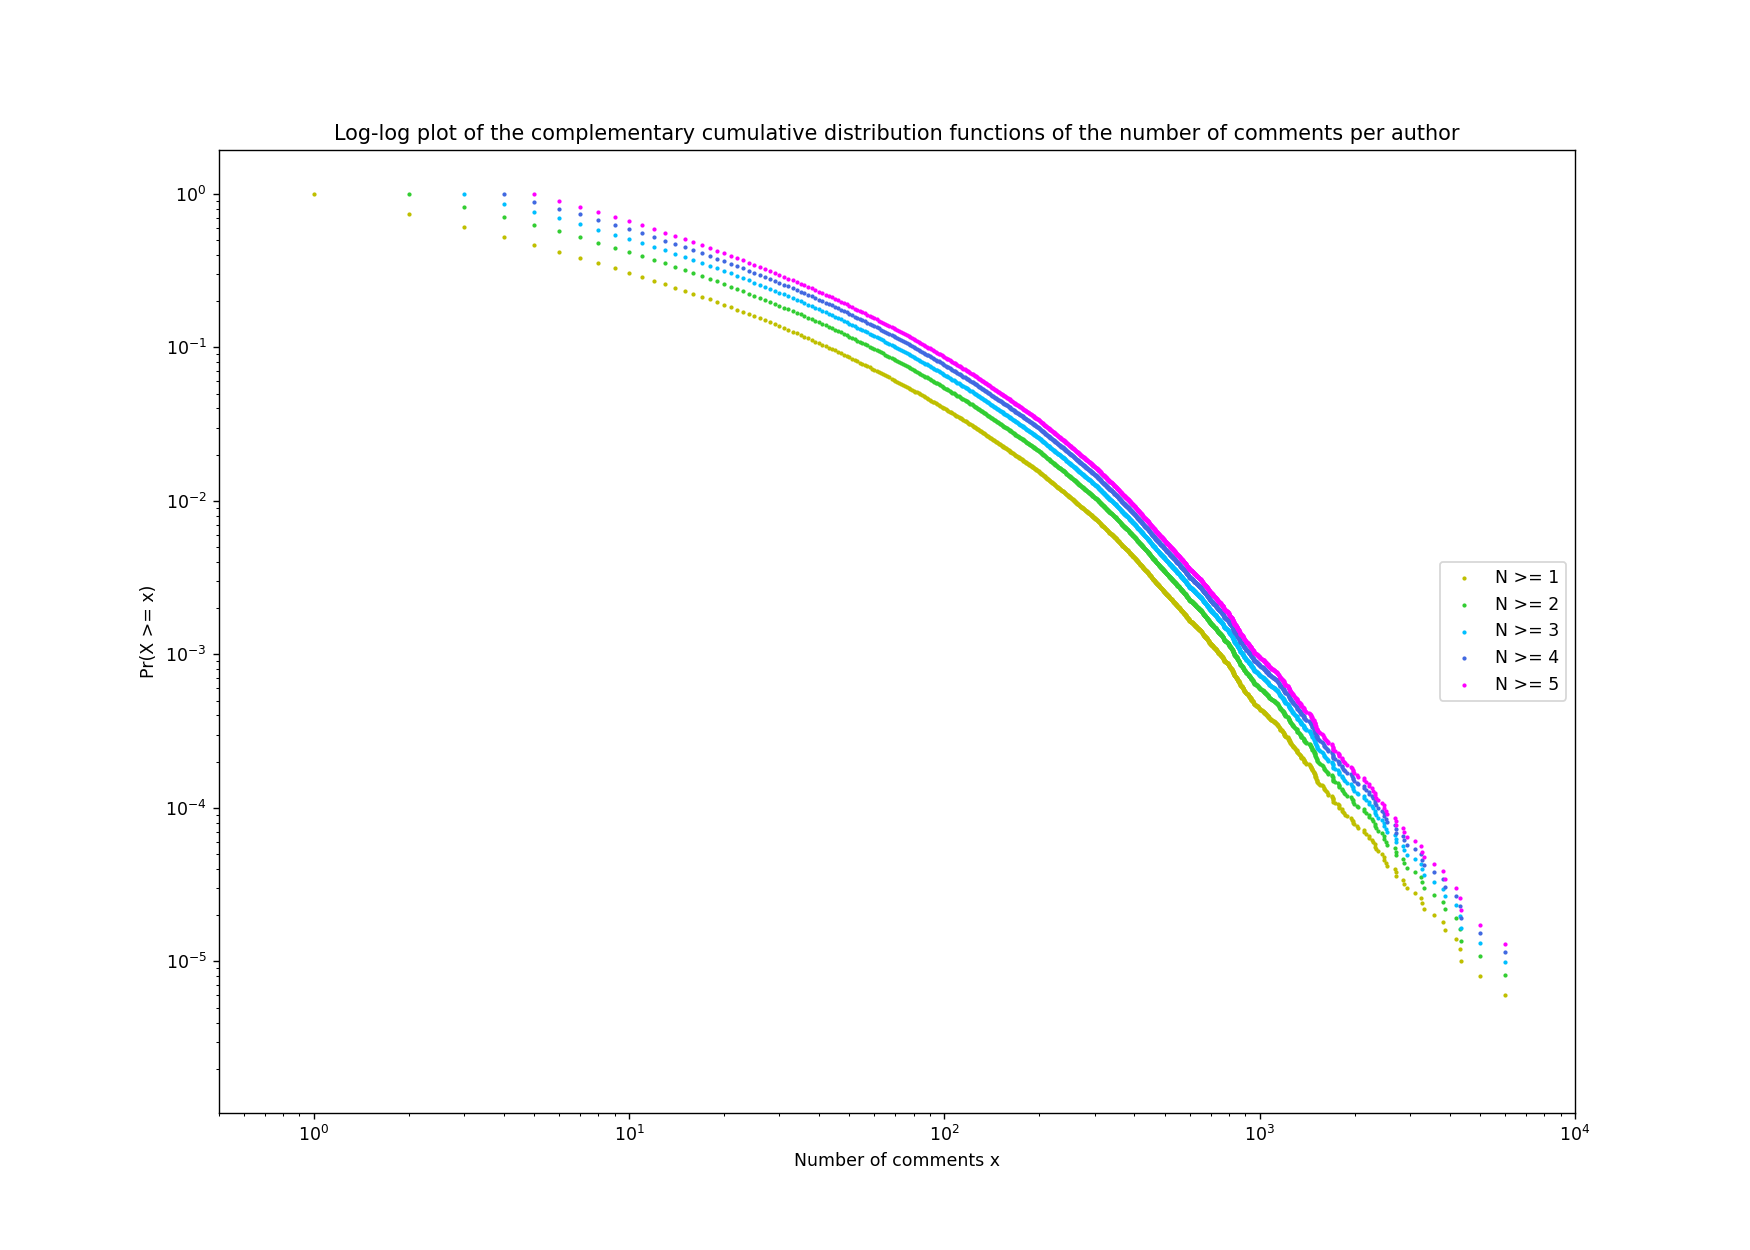

In [49]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111)


ax.scatter(new_df1['comments_count'], new_df1['comp_commu'], s=2, label = 'N >= 1', color = 'y')
ax.scatter(new_df2['comments_count'], new_df2['comp_commu'], s=2, label = 'N >= 2', color = 'limegreen')
ax.scatter(new_df3['comments_count'], new_df3['comp_commu'], s=2, label = 'N >= 3', color = 'deepskyblue')
ax.scatter(new_df4['comments_count'], new_df4['comp_commu'], s=2, label = 'N >= 4', color = 'royalblue')
ax.scatter(new_df5['comments_count'], new_df5['comp_commu'], s=2, label = 'N >= 5', color = 'magenta')
plt.title('Log-log plot of the complementary cumulative distribution functions of the number of comments per author')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.5, 10000])
plt.xlabel('Number of comments x')
plt.ylabel("Pr(X >= x)")
plt.legend(loc='center right');
plt.show()
plt.savefig('img/2080rule/fig_A.png')

### Based on the Clauset-Shalizi-Newman method( implemented by the library *powerlaw* ), we tried to fit the distribution.

In [87]:
data = np.array(comments.loc[:,'author'].value_counts().to_frame().author)
fit = powerlaw.Fit(data)
fit.xmin

Calculating best minimal value for power law fit


374.0

In [94]:
fit = powerlaw.Fit(data, xmin = 374)

In [95]:
fit.power_law.alpha

3.34826925370002

In [103]:
fit.distribution_compare('power_law', 'exponential')

D:\Anaconda3\envs\CS456\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(257.28691011061863, 0.0002885953046883109)

### The exponent is 3.35(*min* = 374, *p* = 0.0003), indicating that the distribution is different from a power law.

### The second task is to study the relation between the cumulative percentage of comments and the cumulative percentage of authors, to see if the 20%-80% rule coincide with the behaviour of our dataset. 

In [50]:
target.columns = ['comments_count']
n_df = target

### N >= 1

In [51]:
n_df1 = n_df.query('comments_count >= 1')
total_comments = n_df1.comments_count.sum()
n_df1['cumsum'] = n_df1['comments_count'].cumsum()
n_df1['percentage_comments'] = 100*n_df1['cumsum']/total_comments
n_df1['index'] = np.arange(1,n_df1.shape[0]+1)
n_df1['percentage_authors'] = 100*n_df1['index']/n_df1.shape[0]

### N >= 2

In [52]:
n_df2 = n_df.query('comments_count >= 2').copy()
total_comments = n_df2.comments_count.sum()
n_df2['cumsum'] = n_df2['comments_count'].cumsum()
n_df2['percentage_comments'] = 100*n_df2['cumsum']/total_comments
n_df2['index'] = np.arange(1,n_df2.shape[0]+1)
n_df2['percentage_authors'] = 100*n_df2['index']/n_df2.shape[0]

### N >= 3

In [53]:
n_df3 = n_df.query('comments_count >= 3').copy()
total_comments = n_df3.comments_count.sum()
n_df3['cumsum'] = n_df3['comments_count'].cumsum()
n_df3['percentage_comments'] = 100*n_df3['cumsum']/total_comments
n_df3['index'] = np.arange(1,n_df3.shape[0]+1)
n_df3['percentage_authors'] = 100*n_df3['index']/n_df3.shape[0]

### N >= 4

In [54]:
n_df4 = n_df.query('comments_count >= 4').copy()
total_comments = n_df4.comments_count.sum()
n_df4['cumsum'] = n_df4['comments_count'].cumsum()
n_df4['percentage_comments'] = 100*n_df4['cumsum']/total_comments
n_df4['index'] = np.arange(1,n_df4.shape[0]+1)
n_df4['percentage_authors'] = 100*n_df4['index']/n_df4.shape[0]

### N >= 5

In [55]:
n_df5 = n_df.query('comments_count >= 5').copy()
total_comments = n_df5.comments_count.sum()
n_df5['cumsum'] = n_df5['comments_count'].cumsum()
n_df5['percentage_comments'] = 100*n_df5['cumsum']/total_comments
n_df5['index'] = np.arange(1,n_df5.shape[0]+1)
n_df5['percentage_authors'] = 100*n_df5['index']/n_df5.shape[0]

<IPython.core.display.Javascript object>


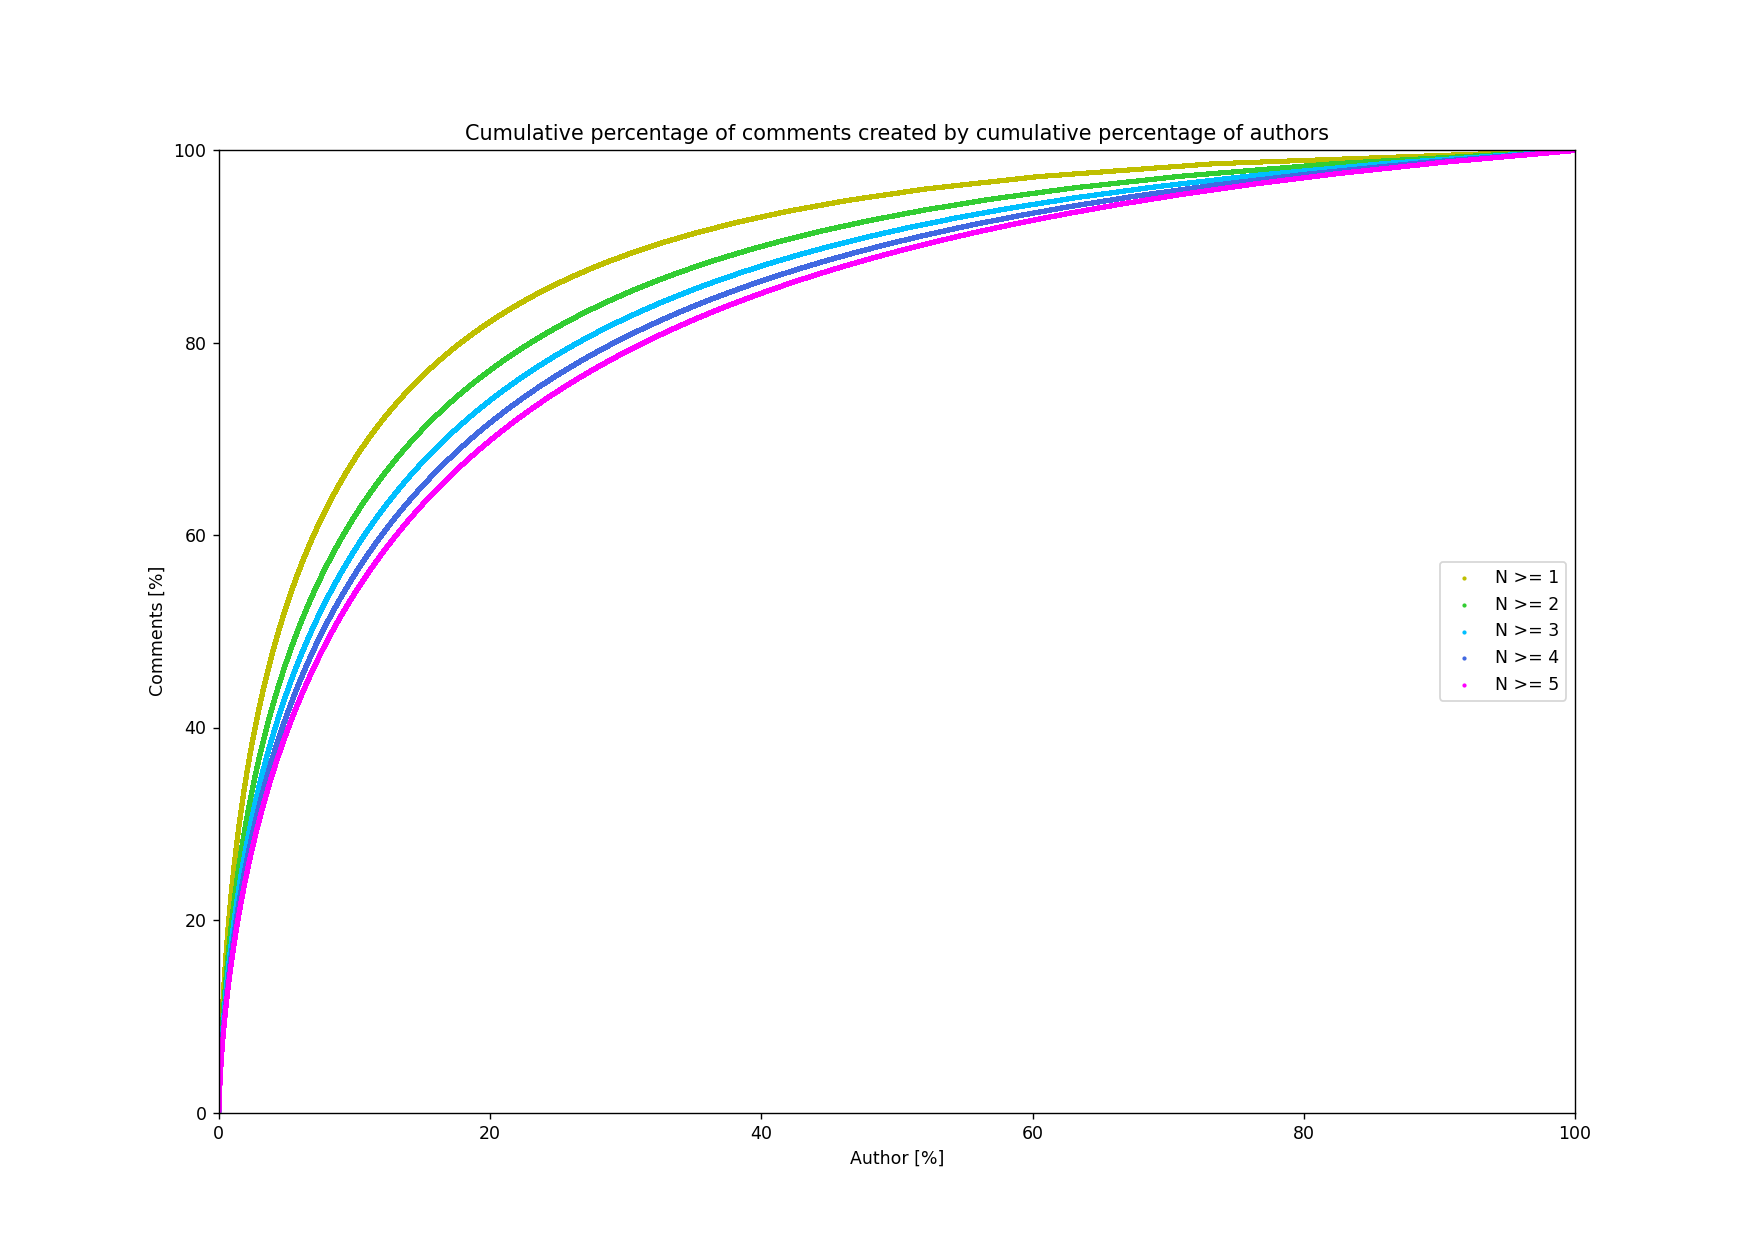

In [56]:
from matplotlib.widgets import Cursor

fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111)


ax.scatter(n_df1['percentage_authors'], n_df1['percentage_comments'], s=2, label = 'N >= 1', color = 'y')
ax.scatter(n_df2['percentage_authors'], n_df2['percentage_comments'], s=2, label = 'N >= 2', color = 'limegreen')
ax.scatter(n_df3['percentage_authors'], n_df3['percentage_comments'], s=2, label = 'N >= 3', color = 'deepskyblue')
ax.scatter(n_df4['percentage_authors'], n_df4['percentage_comments'], s=2, label = 'N >= 4', color = 'royalblue')
ax.scatter(n_df5['percentage_authors'], n_df5['percentage_comments'], s=2, label = 'N >= 5', color = 'magenta')
plt.title('Cumulative percentage of comments created by cumulative percentage of authors')
plt.xlim([0, 100])
plt.ylim([0,100])
plt.xlabel('Author [%]')
plt.ylabel("Comments [%]")
plt.legend(loc='center right')
cursor = Cursor(ax, horizOn = True, vertOn = True, color = 'black', linewidth = 2.0)

plt.show()
plt.savefig('img/2080rule/fig_B.png')

This figure represents the cumulative percentage of comments created by cumulative percentage of authors.<br>     
From the figure, we can tell that 20% of the users created 82% of the comments on Reddit in May 2015. Note that this is for the case where the users have at least 1 comment, which is also the whole dataset of our consideration due to the fact that this dataset only contains the information of the users who has posted comments in May 2015.  <br>

The content generation situation seems to be very different fron the Twitter dataset which is tested by the paper we are studying. If we compare the two cases of N >=1 for the two datasets, we can find that, for Twitter users, roughly 4% of users created 80% of the posts, which is quite different.   <br>

The reason why we have observed the different behaviour could be the different nature of the two datasets. For the Twitter case, the dataset being studied is a random sample of the whole group of Twitter users but on the other hand, our Reddit dataset includes only the users who was active during the month of May in 2015( had at least 1 comment created). What we can say at this point is that, for active users on Reddit, the 20%-80% content generation rule can be verified.

### *To better understand the content generation, we investigated the cumulative percentage of comments created by cumulative percentage of authors in some of the most popular subreddits.*

In [105]:
sub_target = comments.loc[:,'subreddit'].value_counts().to_frame()

In [115]:
sub_target.head(5)

,subreddit
AskReddit,737577
leagueoflegends,222822
nba,137733
funny,130354
pics,107576


### These are the 5 most popular subreddits in May 2015: *AskReddit*, *leagueoflegends*, *nba*, *funny*, *pics*.

### We study the content generation situation in the subreddit *AskReddit*.

In [122]:
comments_askreddit = comments.query("subreddit == 'AskReddit'")
target_askreddit = comments_askreddit.loc[:, 'author'].value_counts().to_frame()
sub_df = pd.DataFrame(target_askreddit.loc[:,'author'].value_counts())
sub_df.reset_index(drop = False, inplace = True)
sub_df.columns = ['comments_count', '# of users']
sub_df = sub_df.sort_values(by = 'comments_count')

In [128]:
# for N >= 1
sub_df1 = sub_df[['comments_count', '# of users']] 
s1 = sub_df1['# of users'].sum()
sub_df1['percentage'] = sub_df1['# of users']/s1
sub_df1['cummu'] = sub_df1['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
sub_df1['comp_commu'] = 1 - sub_df1['cummu'] + sub_df1['percentage'] 

# for N >= 2
sub_df2 = sub_df[['comments_count', '# of users']].loc[1:]
s2 = sub_df2['# of users'].sum()
sub_df2['percentage'] = sub_df2['# of users']/s2
sub_df2['cummu'] = sub_df2['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
sub_df2['comp_commu'] = 1 - sub_df2['cummu'] + sub_df2['percentage'] 

# for N >= 3
sub_df3 = sub_df[['comments_count', '# of users']].loc[2:]
s3 = sub_df3['# of users'].sum()
sub_df3['percentage'] = sub_df3['# of users']/s3
sub_df3['cummu'] = sub_df3['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
sub_df3['comp_commu'] = 1 - sub_df3['cummu'] + sub_df3['percentage'] 

# for N >= 4
sub_df4 = sub_df[['comments_count', '# of users']].loc[3:]
s4 = sub_df4['# of users'].sum()
sub_df4['percentage'] = sub_df4['# of users']/s4
sub_df4['cummu'] = sub_df4['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
sub_df4['comp_commu'] = 1 - sub_df4['cummu'] + sub_df4['percentage'] 

# for N >= 5
sub_df5 = sub_df[['comments_count', '# of users']].loc[4:]
s5 = sub_df5['# of users'].sum()
sub_df5['percentage'] = sub_df5['# of users']/s5
sub_df5['cummu'] = sub_df5['percentage'].cumsum()
# compute the complementary cdf, i.e Pr{X >= x}
sub_df5['comp_commu'] = 1 - sub_df5['cummu'] + sub_df5['percentage'] 

<IPython.core.display.Javascript object>


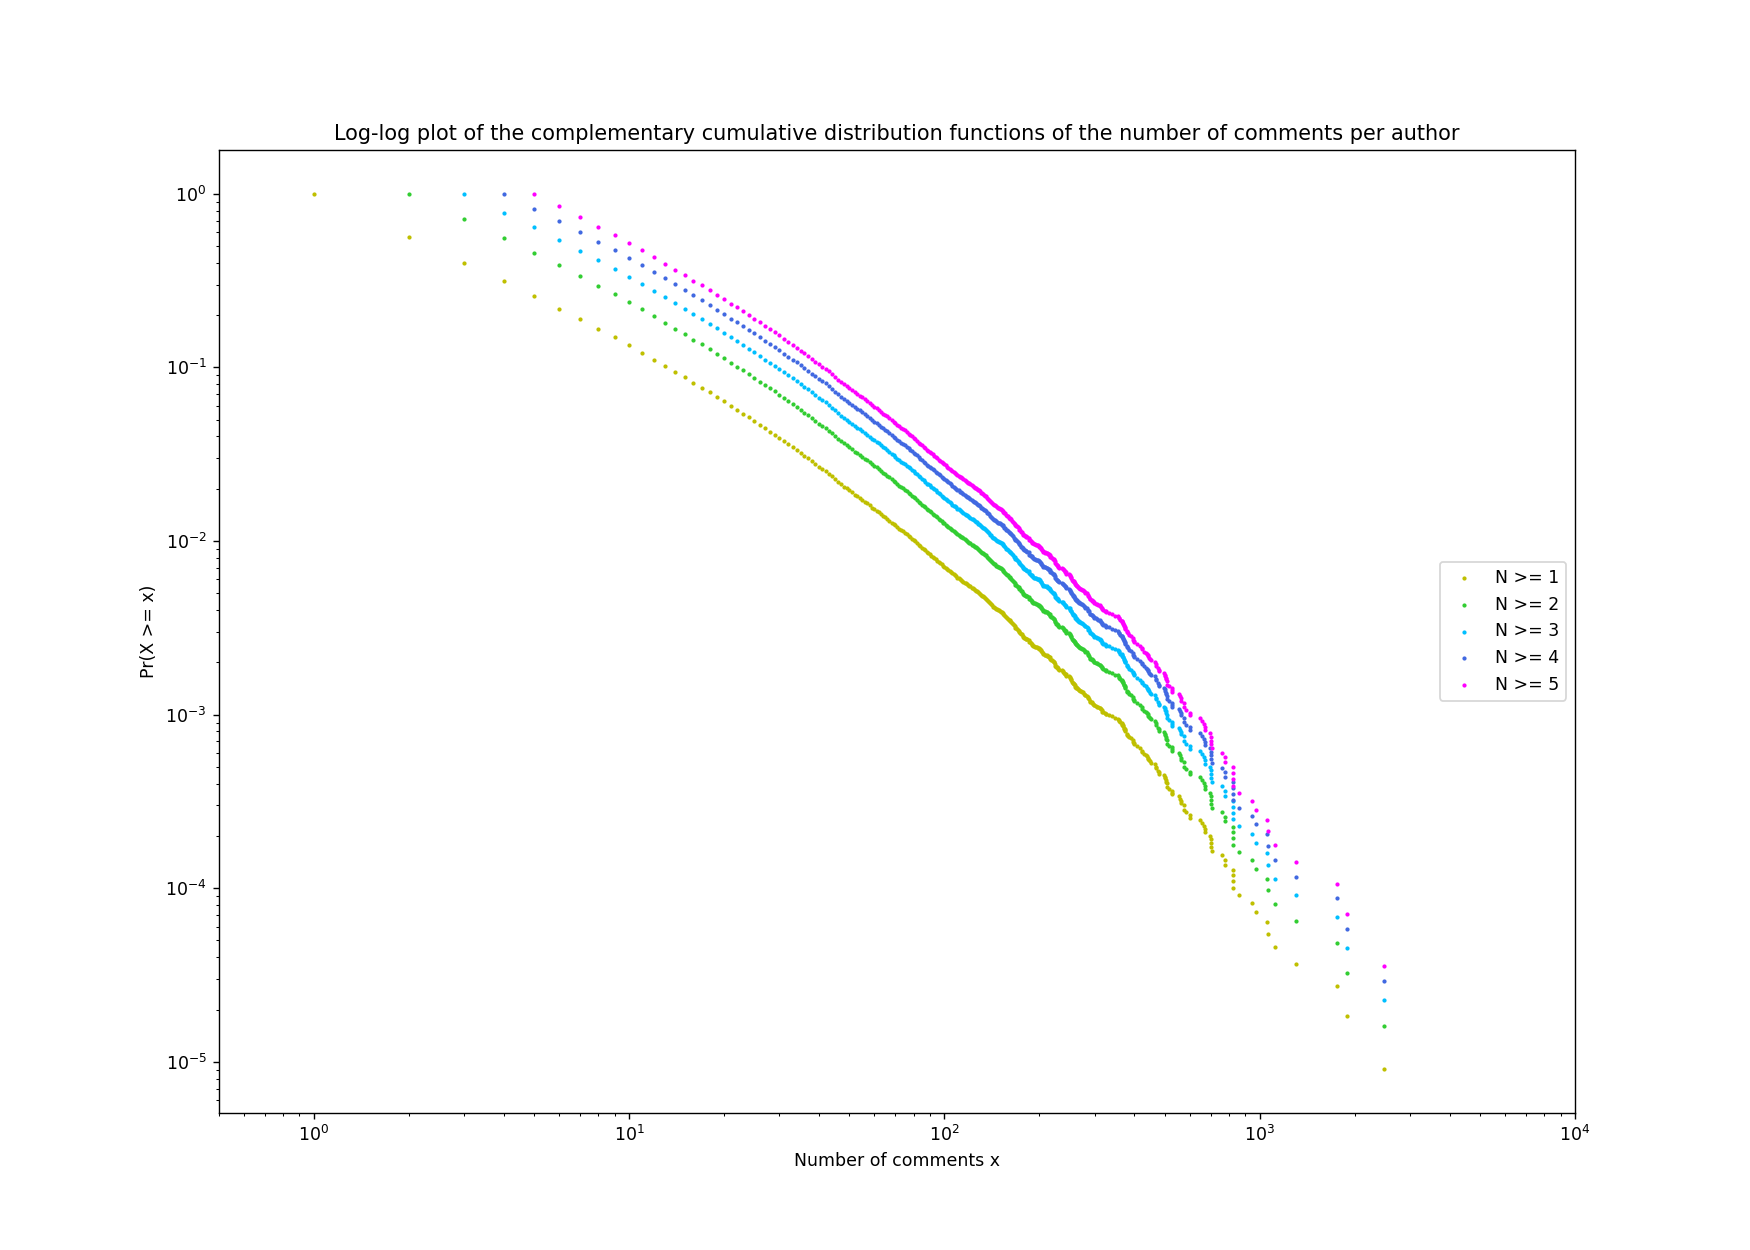

In [129]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111)


ax.scatter(sub_df1['comments_count'], sub_df1['comp_commu'], s=2, label = 'N >= 1', color = 'y')
ax.scatter(sub_df2['comments_count'], sub_df2['comp_commu'], s=2, label = 'N >= 2', color = 'limegreen')
ax.scatter(sub_df3['comments_count'], sub_df3['comp_commu'], s=2, label = 'N >= 3', color = 'deepskyblue')
ax.scatter(sub_df4['comments_count'], sub_df4['comp_commu'], s=2, label = 'N >= 4', color = 'royalblue')
ax.scatter(sub_df5['comments_count'], sub_df5['comp_commu'], s=2, label = 'N >= 5', color = 'magenta')
plt.title('Log-log plot of the complementary cumulative distribution functions of the number of comments per author')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.5, 10000])
plt.xlabel('Number of comments x')
plt.ylabel("Pr(X >= x)")
plt.legend(loc='center right');
plt.show()
plt.savefig('img/2080rule/fig_C.png')

In [135]:
sub_data = np.array(comments_askreddit.loc[:,'author'].value_counts().to_frame().author)
sub_fit = powerlaw.Fit(sub_data)
sub_fit.xmin

Calculating best minimal value for power law fit


34.0

In [136]:
sub_fit = powerlaw.Fit(sub_data, xmin = 34)

In [137]:
sub_fit.power_law.alpha

2.4741305864661767

In [138]:
sub_fit.distribution_compare('power_law', 'exponential')

D:\Anaconda3\envs\CS456\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(678.2861724759529, 1.1139361265860362e-21)

for the subreddit *AskReddit*, the exponent is 2.474(min = 34, p = 0), indicating that the distribution is different from a power law.

In [139]:
target_askreddit.columns = ['comments_count']
sub_n_df = target_askreddit

In [140]:
# for N >= 1
sub_n_df1 = sub_n_df.query('comments_count >= 1')
sub_total_comments = sub_n_df1.comments_count.sum()
sub_n_df1['cumsum'] = sub_n_df1['comments_count'].cumsum()
sub_n_df1['percentage_comments'] = 100*sub_n_df1['cumsum']/sub_total_comments
sub_n_df1['index'] = np.arange(1,sub_n_df1.shape[0]+1)
sub_n_df1['percentage_authors'] = 100*sub_n_df1['index']/sub_n_df1.shape[0]

# for N >= 2
sub_n_df2 = sub_n_df.query('comments_count >= 2').copy()
sub_total_comments = sub_n_df2.comments_count.sum()
sub_n_df2['cumsum'] = sub_n_df2['comments_count'].cumsum()
sub_n_df2['percentage_comments'] = 100*sub_n_df2['cumsum']/sub_total_comments
sub_n_df2['index'] = np.arange(1,sub_n_df2.shape[0]+1)
sub_n_df2['percentage_authors'] = 100*sub_n_df2['index']/sub_n_df2.shape[0]

# for N >= 3
sub_n_df3 = sub_n_df.query('comments_count >= 3').copy()
sub_total_comments = sub_n_df3.comments_count.sum()
sub_n_df3['cumsum'] = sub_n_df3['comments_count'].cumsum()
sub_n_df3['percentage_comments'] = 100*sub_n_df3['cumsum']/sub_total_comments
sub_n_df3['index'] = np.arange(1,sub_n_df3.shape[0]+1)
sub_n_df3['percentage_authors'] = 100*sub_n_df3['index']/sub_n_df3.shape[0]

# for N >= 4
sub_n_df4 = sub_n_df.query('comments_count >= 4').copy()
sub_total_comments = sub_n_df4.comments_count.sum()
sub_n_df4['cumsum'] = sub_n_df4['comments_count'].cumsum()
sub_n_df4['percentage_comments'] = 100*sub_n_df4['cumsum']/sub_total_comments
sub_n_df4['index'] = np.arange(1,sub_n_df4.shape[0]+1)
sub_n_df4['percentage_authors'] = 100*sub_n_df4['index']/sub_n_df4.shape[0]

# for N >= 5
sub_n_df5 = sub_n_df.query('comments_count >= 5').copy()
sub_total_comments = sub_n_df5.comments_count.sum()
sub_n_df5['cumsum'] = sub_n_df5['comments_count'].cumsum()
sub_n_df5['percentage_comments'] = 100*sub_n_df5['cumsum']/sub_total_comments
sub_n_df5['index'] = np.arange(1,sub_n_df5.shape[0]+1)
sub_n_df5['percentage_authors'] = 100*sub_n_df5['index']/sub_n_df5.shape[0]

<IPython.core.display.Javascript object>


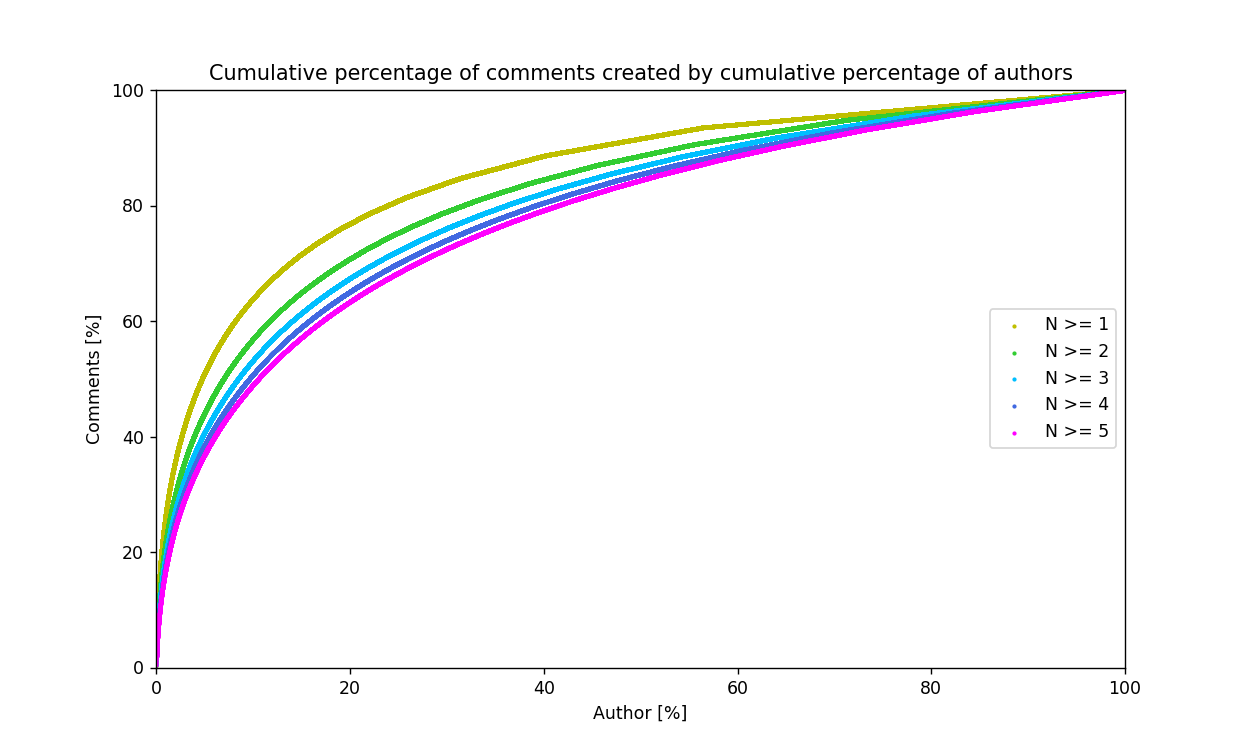

In [143]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


ax.scatter(sub_n_df1['percentage_authors'], sub_n_df1['percentage_comments'], s=2, label = 'N >= 1', color = 'y')
ax.scatter(sub_n_df2['percentage_authors'], sub_n_df2['percentage_comments'], s=2, label = 'N >= 2', color = 'limegreen')
ax.scatter(sub_n_df3['percentage_authors'], sub_n_df3['percentage_comments'], s=2, label = 'N >= 3', color = 'deepskyblue')
ax.scatter(sub_n_df4['percentage_authors'], sub_n_df4['percentage_comments'], s=2, label = 'N >= 4', color = 'royalblue')
ax.scatter(sub_n_df5['percentage_authors'], sub_n_df5['percentage_comments'], s=2, label = 'N >= 5', color = 'magenta')
plt.title('Cumulative percentage of comments created by cumulative percentage of authors')
plt.xlim([0, 100])
plt.ylim([0,100])
plt.xlabel('Author [%]')
plt.ylabel("Comments [%]")
plt.legend(loc='center right')
cursor = Cursor(ax, horizOn = True, vertOn = True, color = 'black', linewidth = 2.0)

plt.show()
plt.savefig('img/2080rule/fig_D.png')

For the subreddit *AskReddit*, 20% of the users created 77% of the comments, which is still very close to the 20%-80% rule of content generation.

# Circadian rhythms <a class="anchor" id="chapter2"></a>

There is a big issue about the test on the proposition of circadian rhythms for this dataset of Reddit comments.<br>
There is no information about the local time in the dataset so the study we can persue on this dataset will be very limited. And the result wouldn't be very representative.

In [178]:
comments_cr = comments[['created_utc', 'author']].copy()

In [179]:
import datetime
date = datetime.datetime.fromtimestamp(comments_cr.iloc[0,0])
def get_time(t):
    t_date = datetime.datetime.fromtimestamp(t)
    return pd.Timestamp(t_date)

In [180]:
comments_cr['utc_time'] = comments_cr['created_utc'].apply(lambda x: get_time(x))
comments_cr['DofW'] = comments_cr['utc_time'].apply(lambda x: x.dayofweek)
comments_cr['HofD'] = comments_cr['utc_time'].apply(lambda x: x.hour)

In [183]:
# for Monday
comments_cr_mon = comments_cr.query('DofW == 0')
count_mon = pd.DataFrame(comments_cr_mon.loc[:,'HofD'].value_counts())
count_mon.reset_index(drop = False, inplace = True)
count_mon.columns = ['HofD', '# of comments']
count_mon = count_mon.sort_values(by = 'HofD')

# for Tuesday
comments_cr_tue = comments_cr.query('DofW == 1')
count_tue = pd.DataFrame(comments_cr_tue.loc[:,'HofD'].value_counts())
count_tue.reset_index(drop = False, inplace = True)
count_tue.columns = ['HofD', '# of comments']
count_tue = count_tue.sort_values(by = 'HofD')

# for Wednesday
comments_cr_wed = comments_cr.query('DofW == 2')
count_wed = pd.DataFrame(comments_cr_wed.loc[:,'HofD'].value_counts())
count_wed.reset_index(drop = False, inplace = True)
count_wed.columns = ['HofD', '# of comments']
count_wed = count_wed.sort_values(by = 'HofD')

# for Thursday
comments_cr_thu = comments_cr.query('DofW == 3')
count_thu = pd.DataFrame(comments_cr_thu.loc[:,'HofD'].value_counts())
count_thu.reset_index(drop = False, inplace = True)
count_thu.columns = ['HofD', '# of comments']
count_thu = count_thu.sort_values(by = 'HofD')

# for Friday
comments_cr_fri = comments_cr.query('DofW == 4')
count_fri = pd.DataFrame(comments_cr_fri.loc[:,'HofD'].value_counts())
count_fri.reset_index(drop = False, inplace = True)
count_fri.columns = ['HofD', '# of comments']
count_fri = count_fri.sort_values(by = 'HofD')

# for Saturday
comments_cr_sat = comments_cr.query('DofW == 5')
count_sat = pd.DataFrame(comments_cr_sat.loc[:,'HofD'].value_counts())
count_sat.reset_index(drop = False, inplace = True)
count_sat.columns = ['HofD', '# of comments']
count_sat = count_sat.sort_values(by = 'HofD')

# for Sunday
comments_cr_sun = comments_cr.query('DofW == 6')
count_sun = pd.DataFrame(comments_cr_sun.loc[:,'HofD'].value_counts())
count_sun.reset_index(drop = False, inplace = True)
count_sun.columns = ['HofD', '# of comments']
count_sun = count_sun.sort_values(by = 'HofD')

plot the weekly rhythms of the comments

<IPython.core.display.Javascript object>


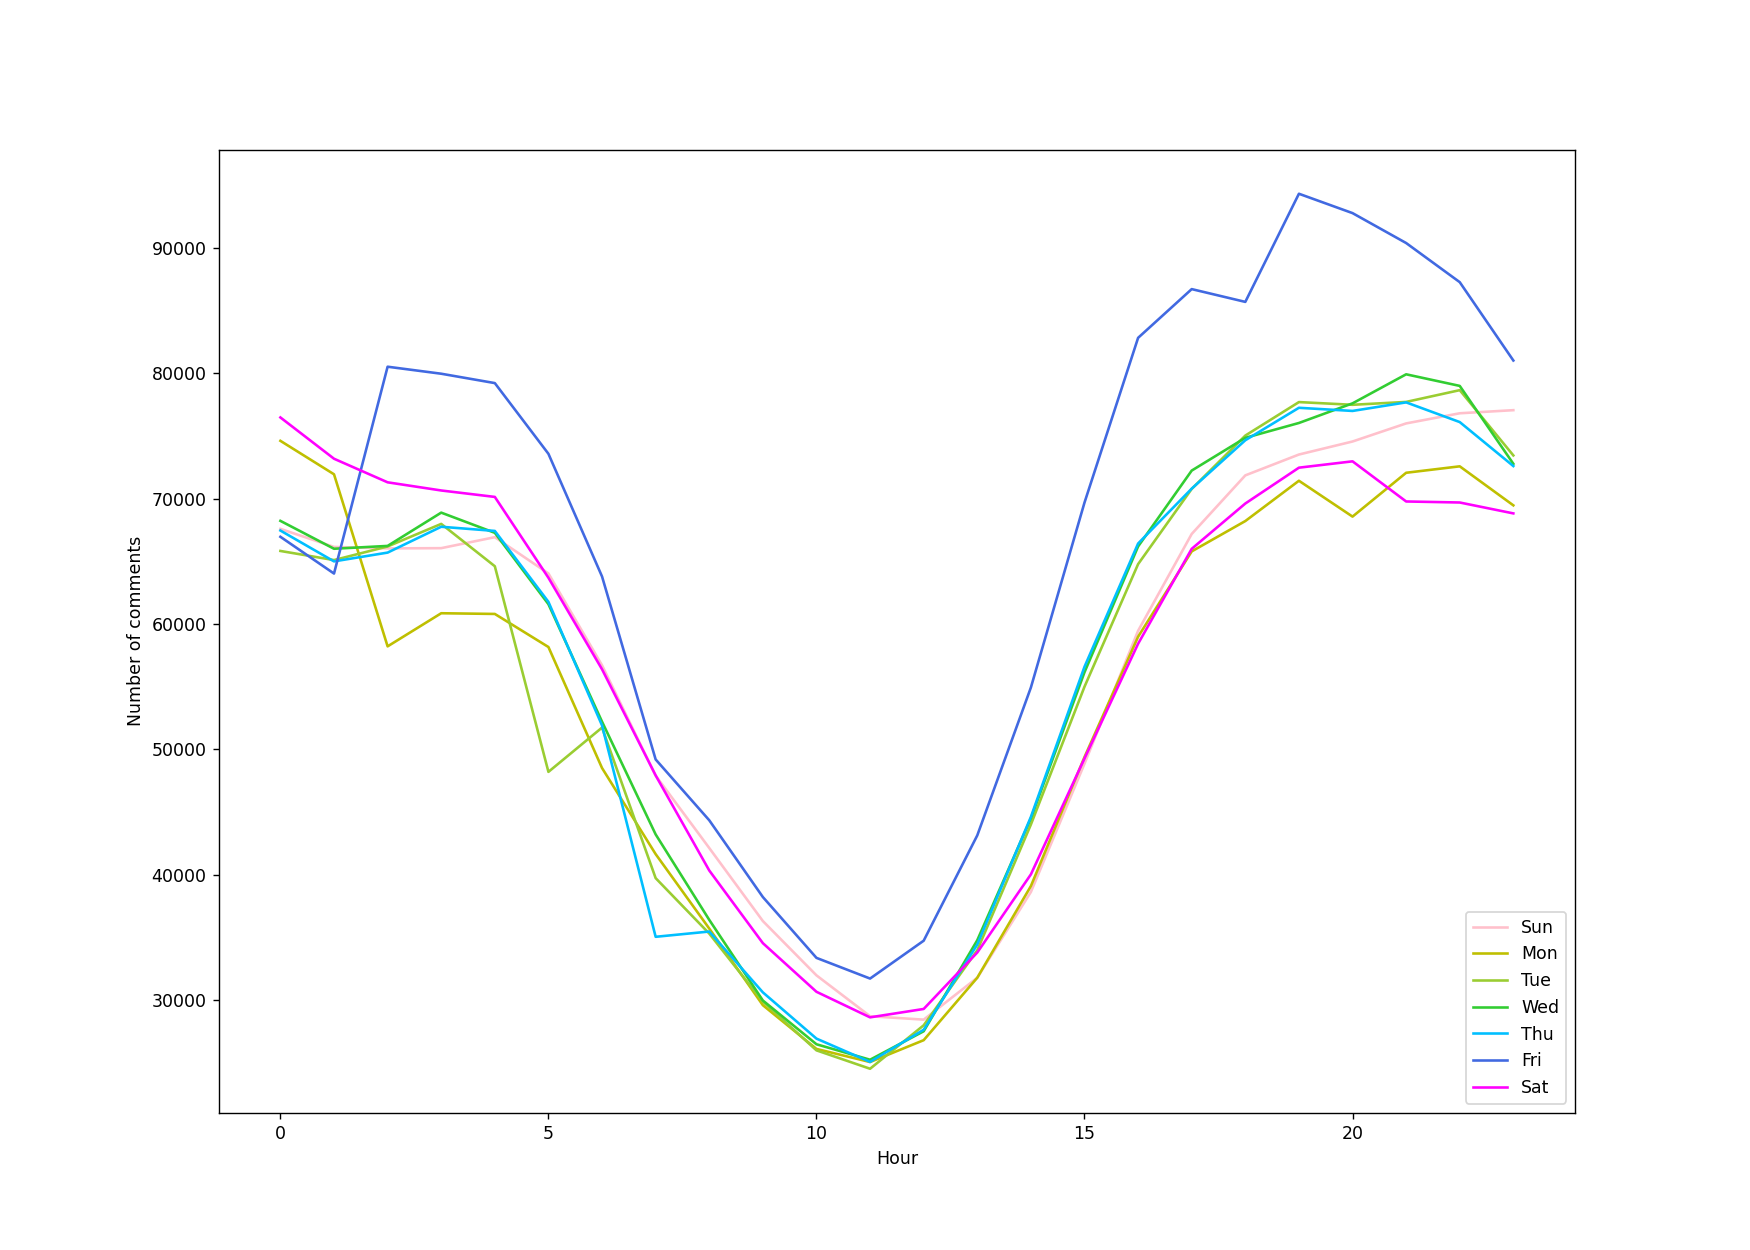

In [186]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111)

ax.plot(count_sun['HofD'], count_sun['# of comments'],  label = 'Sun', color = 'pink')
ax.plot(count_mon['HofD'], count_mon['# of comments'],  label = 'Mon', color = 'y')
ax.plot(count_tue['HofD'], count_tue['# of comments'],  label = 'Tue', color = 'yellowgreen')
ax.plot(count_wed['HofD'], count_wed['# of comments'],  label = 'Wed', color = 'limegreen')
ax.plot(count_thu['HofD'], count_thu['# of comments'],  label = 'Thu', color = 'deepskyblue')
ax.plot(count_fri['HofD'], count_fri['# of comments'],  label = 'Fri', color = 'royalblue')
ax.plot(count_sat['HofD'], count_sat['# of comments'],  label = 'Sat', color = 'magenta')

plt.xlabel('Hour')
plt.ylabel("Number of comments")
plt.legend(loc='lower right');
plt.show()
plt.savefig('img/circadian_rhythms/fig_a.png')

We compare it with some result from the Twitter study.

Populating the interactive namespace from numpy and matplotlib


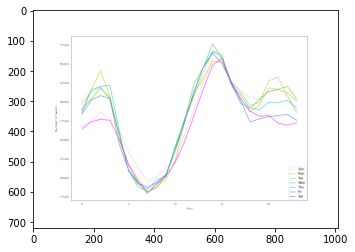

In [187]:
%pylab inline
import matplotlib.image as mpimg
img = mpimg.imread('img/circadian_rhythms/reference_image.png')
imgplot = plt.imshow(img)
plt.show()

Compared to the plot obtained without emphasizing the local time information of the Twitter dataset, we can spot the similar tendency of the curve. The number of comments goes up beginning at some point in a day, then it goes down.
If we want some more accurate analysis on the circadian rhythms, we need more information about the local time information for the created comments with some other dataset.

# Attention and productivity <a class="anchor" id="chapter3"></a>

Furthermore, we will try to find if the attention of the other users have an influence on the productivity of one user. As we don't have the notion of follower/following on reddit, the attention will be measured by the mean score of a user (mean score of his comments), and the productivity corresponds to the number of comments posted.

## The whole dataset

In [14]:
# We need to group the comments by user, mean the score of all comments and get the number 
user_comments = comments.groupby(comments.author)
user_attention = user_comments['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_comments['score'].agg('count')

In [15]:
user_attention.head()

,score,number_comments
author,,
---,5.295455,176
---------MC---------,3.037037,27
-------david-------,5.500000,4
-------pug-------,1.800000,5
-----A,4.500000,2


<IPython.core.display.Javascript object>


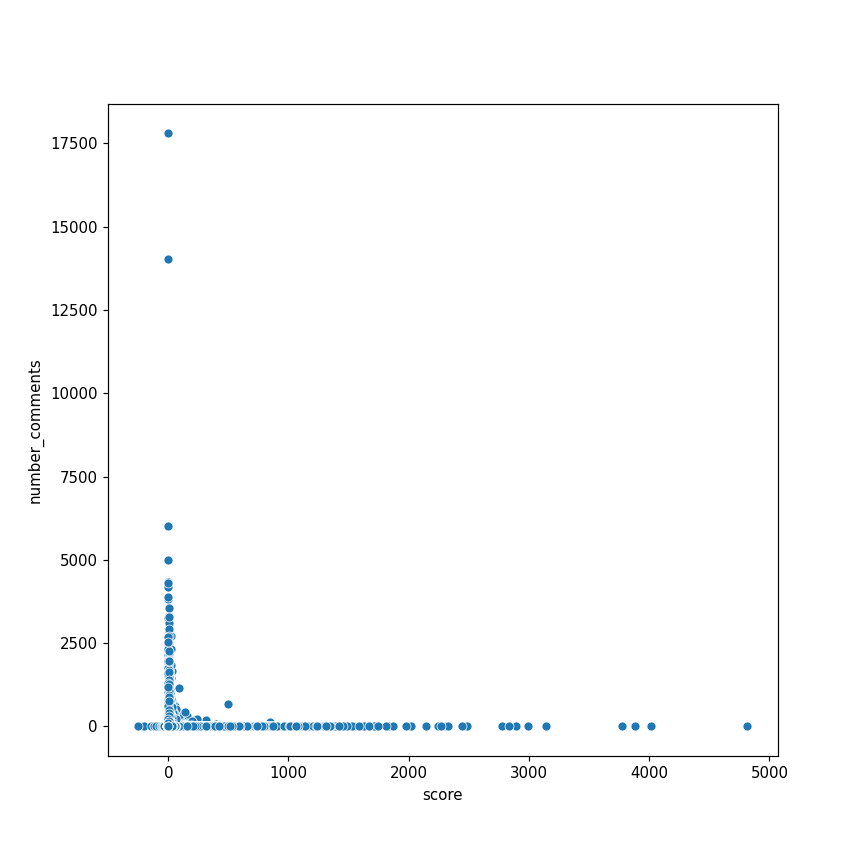

In [16]:
# We can have a first look at the data:
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=user_attention, x="score", y="number_comments")

In [17]:
# Have a look a the pearson correlation: 
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(0.005938038088337629, 2.682697853793166e-05)

As the p value is smaller than 0.05, there is a significant correlation. However it is too small (0.0059) to indicate any clear linear relationship. To compare with the Twitter study, the Pearson correlation between number of followers and the average number of tweets is 0.70, so much larger.

<IPython.core.display.Javascript object>


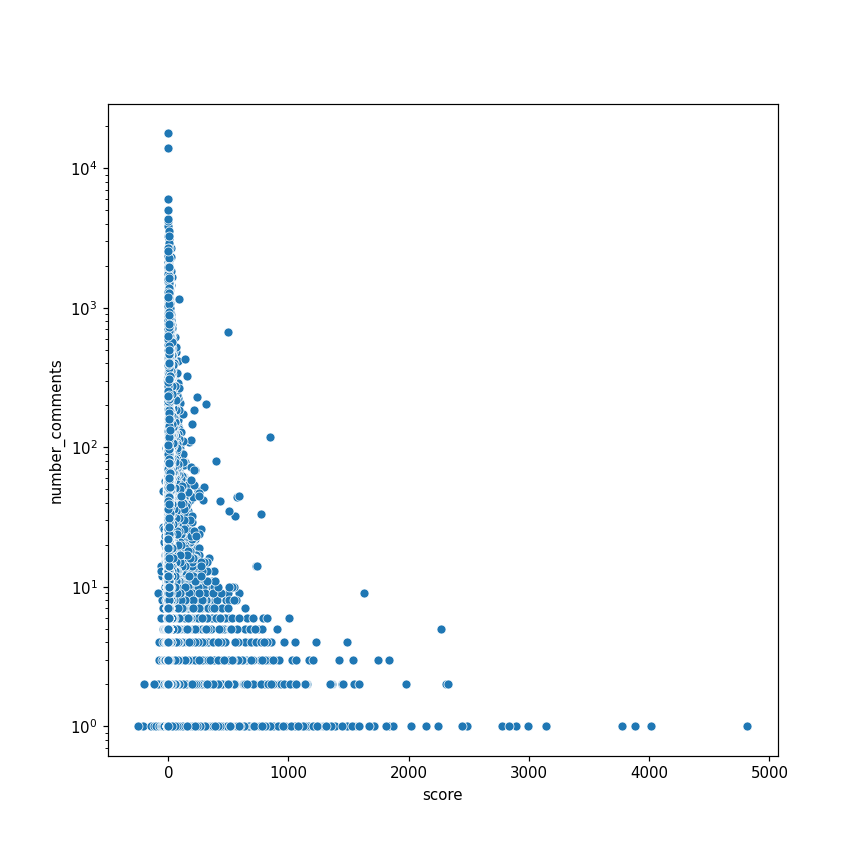

[None]

In [18]:
# Then we can apply a log transformation on the number of comments, but not yet on the score as it can be negative
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=user_attention, x="score", y="number_comments")
g.set(yscale="log")

<IPython.core.display.Javascript object>


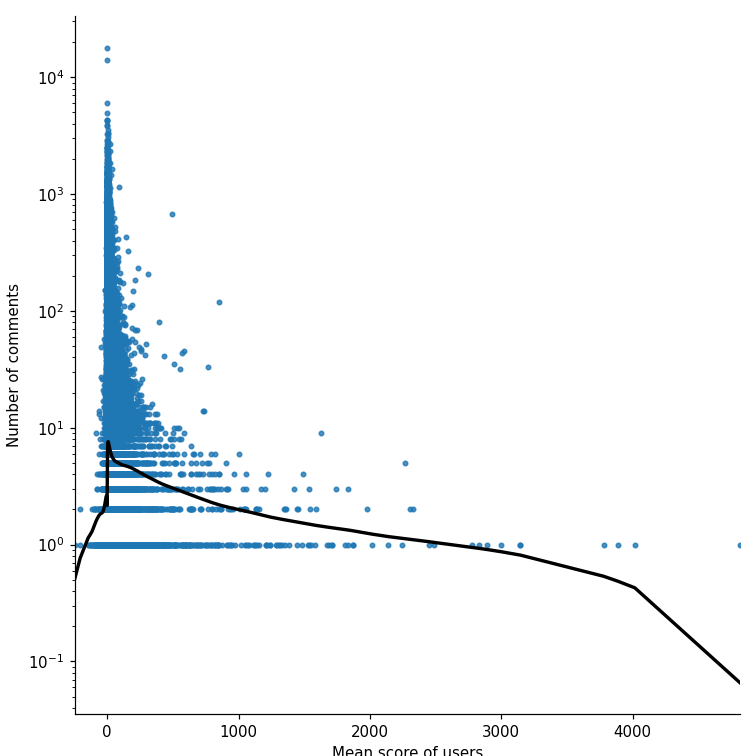

In [19]:
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g = g.set(yscale="log")
g = g.set_axis_labels("Mean score of users", "Number of comments")

The behavior shown here is really different from the one observed in the Twitter studies. There seems to have a positive dependency between the mean score of users and the number of comments for negative score. This would mean that people that got negative score in average could be less active and post less. Then, we can believe there is also a kind of saturation here, as in the Twitter studies. However, the saturation happens at a really low value of score, meaning this is not the same effect as in Twitter, where accounts with too much followers are not as active as users with a huge (but less) number of followers.

It really seems on this graph that there is no linear positive correlation: users with a higher mean scores didn't post more. It even seems that this is the contrary: users with a very high score only posts once! This is maybe also linked with how we measure the attention: people that posts a lot indeed have more scores and so probably more posts with lower score. This could explain the phenomena shown on the graph. 

## The subreddits

Now that we tried to analysis the whole dataset, we will apply the same method in some subset of the dataset: some subreddits. This will allow us to determine if there is a kind of Simpson's paradox, if the analysis for the subset are in contradiction with the analysis of the whole.

### Askreddit

In [26]:
user_askreddit = comments[comments['subreddit'] == 'AskReddit'].groupby(['author'])
user_attention = user_askreddit['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_askreddit['score'].agg('count')

In [27]:
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(0.006291483723402557, 0.037220002566306004)

The test indicate a significant correlation (p<0.05) but no clear linear relation (pearson correlation is 0.006).

<IPython.core.display.Javascript object>


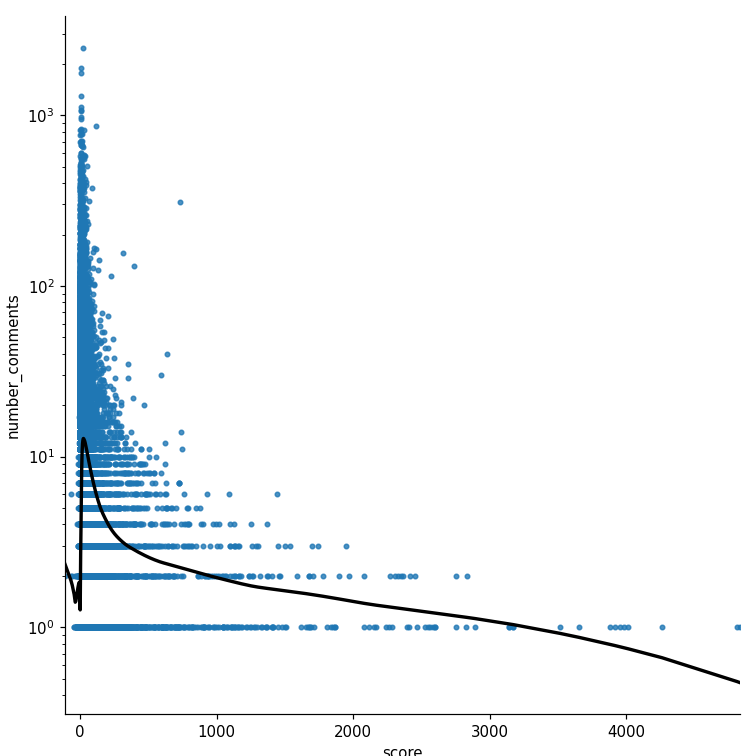

In [28]:
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g.set(yscale="log")

We can observe the same trend as before in this subreddit: there seems to be no Simpson's paradox!

### Funny

<IPython.core.display.Javascript object>


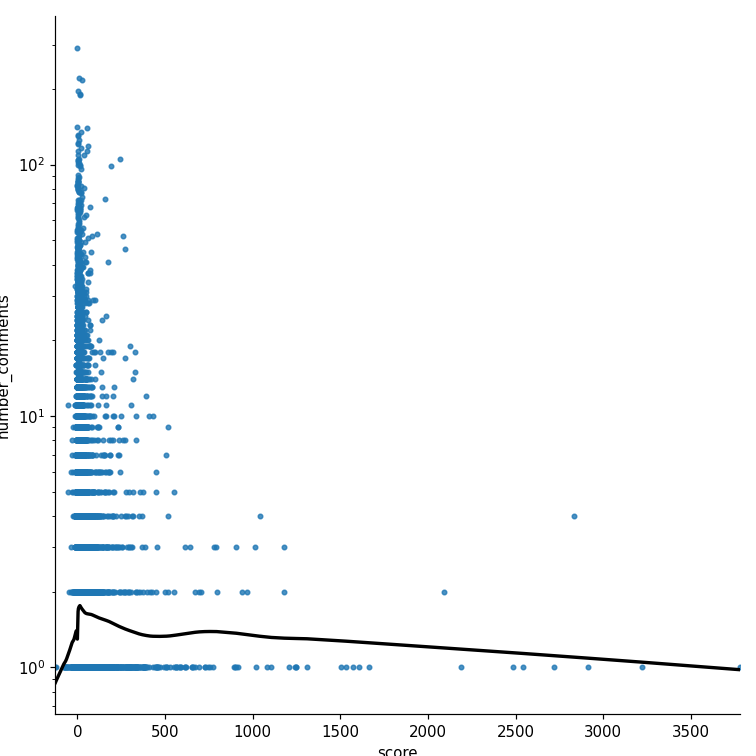

In [30]:
user_funny = comments[comments['subreddit'] == 'funny'].groupby(['author'])
user_attention = user_funny['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_funny['score'].agg('count')
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g.set(yscale="log")

Again the same trend, the number of comments increase with the mean score for the negatives mean score values, and then it stabilizes arround 1.

In [31]:
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(0.015790936493597085, 0.001032249441253195)

The test indicate a significant correlation (p<0.05) but no clear linear relation (pearson correlation is 0.016).

### Pics

<IPython.core.display.Javascript object>


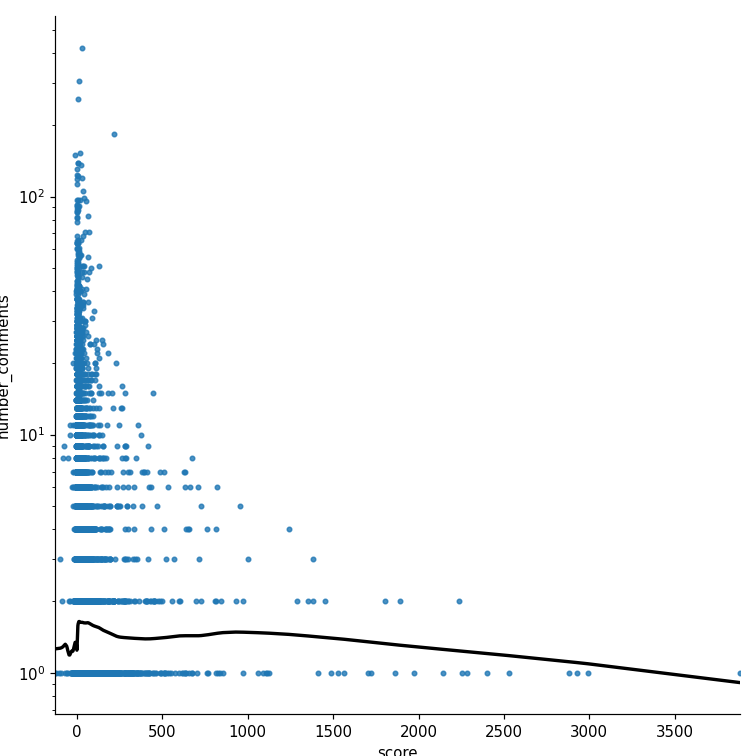

In [32]:
user_pics = comments[comments['subreddit'] == 'pics'].groupby(['author'])
user_attention = user_pics['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_pics['score'].agg('count')
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g.set(yscale="log")

Still the same trend with Pics subreddit, even there is less fluctuations.

In [33]:
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(0.015397811305897666, 0.002222911195630538)

The test indicate a significant correlation (p<0.05) but no clear linear relation (pearson correlation is 0.015).

### NBA

<IPython.core.display.Javascript object>


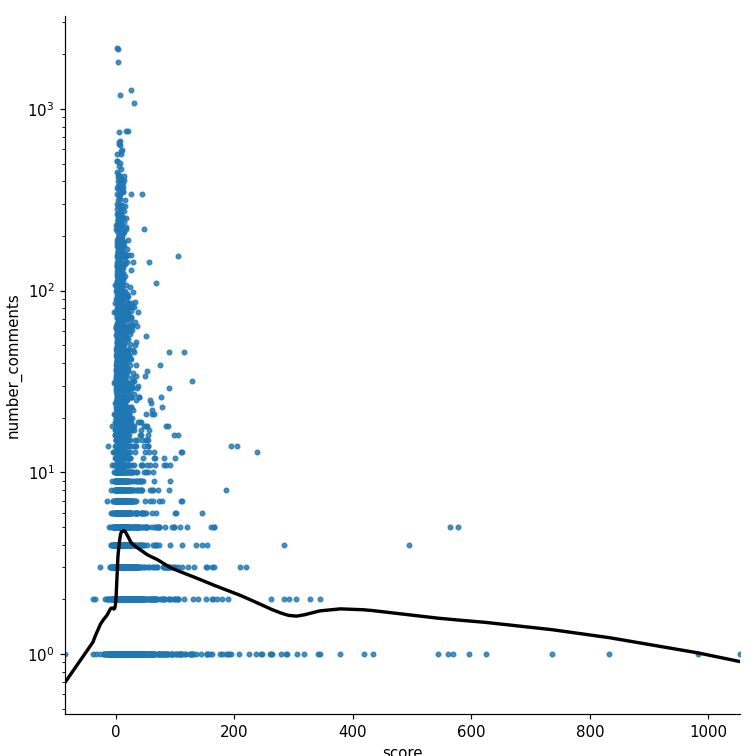

In [34]:
user_nba = comments[comments['subreddit'] == 'nba'].groupby(['author'])
user_attention = user_nba['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_nba['score'].agg('count')
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g.set(yscale="log")

Same trend as the whole dataset.

In [35]:
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(-0.00663266288996579, 0.534143787825485)

The test indicate no significant correlation (p>0.05).

### League of Legends

<IPython.core.display.Javascript object>


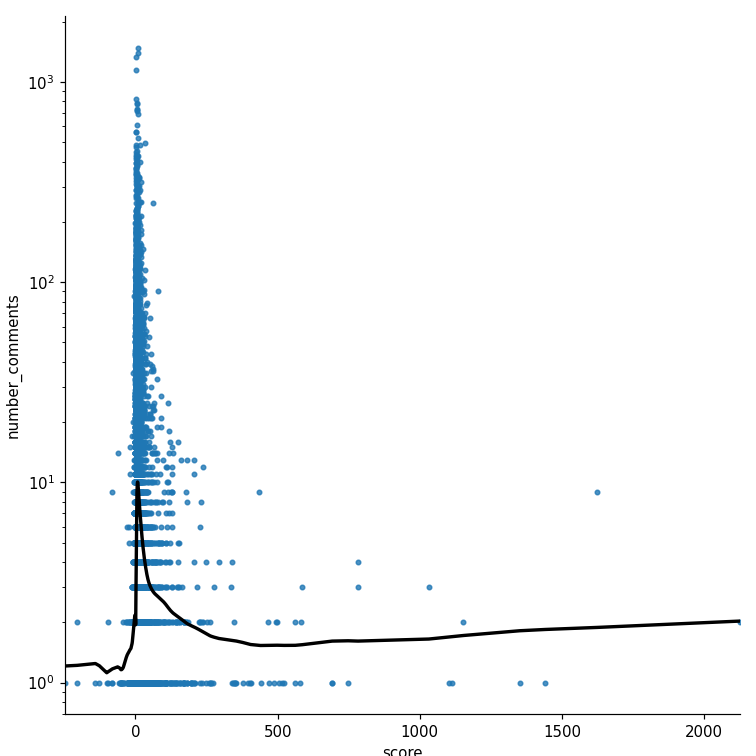

In [36]:
user_leagueoflegends = comments[comments['subreddit'] == 'leagueoflegends'].groupby(['author'])
user_attention = user_leagueoflegends['score'].agg('mean').to_frame()
user_attention['number_comments'] = user_leagueoflegends['score'].agg('count')
g = sns.lmplot(x="score", y="number_comments", data=user_attention, line_kws={'color': 'black'}, markers=".", height=7, lowess=True)
g.set(yscale="log")

For the first time, there seems graphically that the number of comments increase with the mean score! However, there is only few values that indicates this result. We need to do a Pearson correlation to know if there is a significant correlation:

In [37]:
stats.pearsonr(user_attention['score'],user_attention['number_comments'])

(0.0025581114020353972, 0.6987006138986122)

The test indicate no significant correlation (p>0.05).

## Conclusion

To conclude, we could believe that people that have a higher mean score still wants to post more and to get higher score again. This is something that can be observed on Twitter, but not here. We can think that this is linked with the way Reddit is dealing with accounts: there is no principle of follower/following or any metrics that can be used to compare the different users. In other words, there is no concept of the most funny or the most watch account, rather Reddit users seems to be more focused on the subreddits and the content itself.